In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('figure', figsize=(12, 8))

In [2]:
#Load the task_data.csv dataset (with data description in task_data_description.txt).

In [3]:
df = pd.read_csv('task_data.csv')

In [4]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [5]:
#Select at least 2 features with nominal scale, 1 with dichotomous scale, 2 with ordinal scale, 
#2 with discrete numeric scale, and 2 with numeric continuous scale.

In [6]:
#Data types & measurement scales
#        Nominal - MSZoning, Street, RoofStyle, RoofMatl
#        Dichotomous - CentralAir
#        Ordinal (string or int) - Utilities, PavedDrive
#        Numeric discrete (int) - OverallQual, OverallCond
#        Numeric continuous (interval/ratio) (float) - GrLivArea,SalePrice

In [7]:
df2 = df[['Street', 'MSZoning', 'Utilities', 'PavedDrive', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'CentralAir', 
    'GrLivArea', 'SalePrice']]

In [8]:
#Validate domains of all those selected features.

In [9]:
df2.nunique()

Street           2
MSZoning         5
Utilities        2
PavedDrive       3
OverallQual     10
OverallCond      9
RoofStyle        6
RoofMatl         8
CentralAir       2
GrLivArea      861
SalePrice      663
dtype: int64

In [10]:
df2.describe()

,OverallQual,OverallCond,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1515.463699,180921.195890
std,1.382997,1.112799,525.480383,79442.502883
min,1.000000,1.000000,334.000000,34900.000000
25%,5.000000,5.000000,1129.500000,129975.000000
50%,6.000000,5.000000,1464.000000,163000.000000
75%,7.000000,6.000000,1776.750000,214000.000000
max,10.000000,9.000000,5642.000000,755000.000000


In [11]:
df2.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [12]:
df2.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [13]:
df2.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [14]:
df2.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [15]:
df2.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [16]:
df2.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [17]:
#Convert them to proper format.

In [18]:
df2.Utilities.unique()
df2.Utilities = df2.Utilities.astype('category', categories = ['AllPub', 'NoSeWa'], ordered = False)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
df2.MSZoning = df2.MSZoning.astype('category', categories = ['RL', 'RM', 'C (all)', 'FV', 'RH'], ordered = False)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
df2.PavedDrive = df2.PavedDrive.astype('category', categories = ['Y', 'P', 'N'], ordered = True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
display(df2['PavedDrive'].unique())

[Y, N, P]
Categories (3, object): [Y < P < N]

In [22]:
df2.CentralAir = df2.CentralAir.astype('category', categories = ['Y', 'N'], ordered = False)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
#The next part just for interested

In [25]:
Roof_St = {'Gable': 0, 'Hip': 1, 'Gambrel': 2, 'Mansard': 3, 'Flat': 4, 'Shed': 5}
df2["RoofStyle"] = df2["RoofStyle"].apply(lambda s: Roof_St.get(s))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
Roof_Mat = {'CompShg': 0, 'WdShngl': 1, 'Metal': 2, 'WdShake': 3, 'Membran': 4, 'Tar&Grv': 5, 'Roll':6, 'ClyTile':7}
df2["RoofMatl"] = df2["RoofMatl"].apply(lambda s: Roof_Mat.get(s))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
Street         1460 non-null object
MSZoning       1460 non-null category
Utilities      1460 non-null category
PavedDrive     1460 non-null category
OverallQual    1460 non-null int64
OverallCond    1460 non-null int64
RoofStyle      1460 non-null int64
RoofMatl       1460 non-null int64
CentralAir     1460 non-null category
GrLivArea      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: category(4), int64(6), object(1)
memory usage: 86.1+ KB


In [28]:
df2.describe()

,OverallQual,OverallCond,RoofStyle,RoofMatl,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,0.267808,0.065068,1515.463699,180921.195890
std,1.382997,1.112799,0.611903,0.539603,525.480383,79442.502883
min,1.000000,1.000000,0.000000,0.000000,334.000000,34900.000000
25%,5.000000,5.000000,0.000000,0.000000,1129.500000,129975.000000
50%,6.000000,5.000000,0.000000,0.000000,1464.000000,163000.000000
75%,7.000000,6.000000,0.000000,0.000000,1776.750000,214000.000000
max,10.000000,9.000000,5.000000,7.000000,5642.000000,755000.000000


In [29]:
#Try to detect some outliers (hint: use GrLivArea and SalePrice).

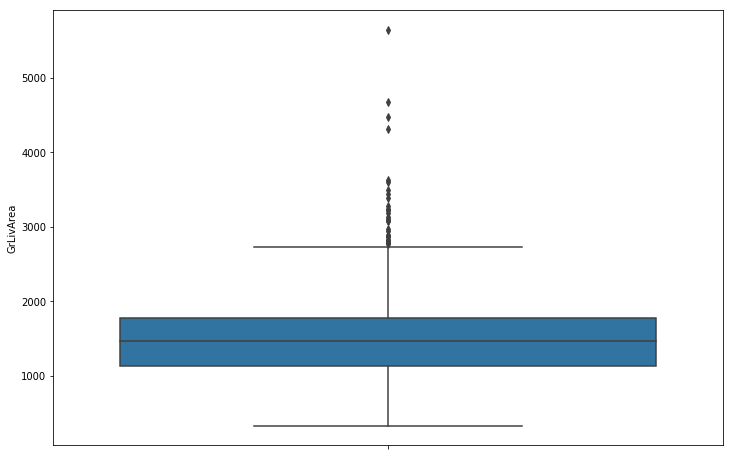

In [30]:
sns.boxplot(y='GrLivArea', data=df2)

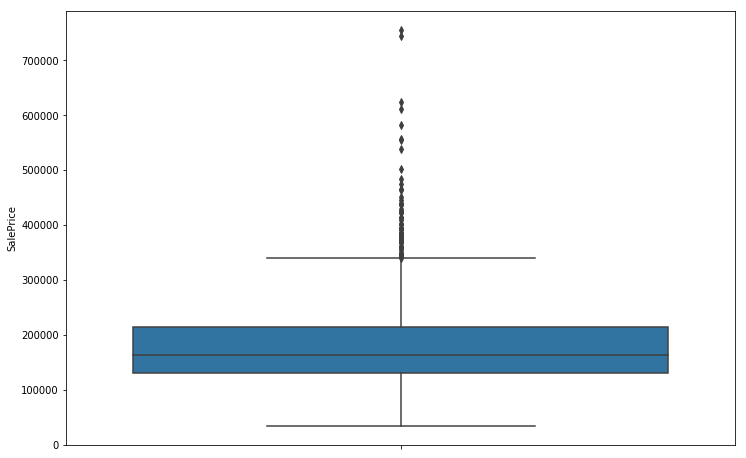

In [31]:
sns.boxplot(y='SalePrice', data=df2)

In [32]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [51]:
df2.GrLivArea[(df['GrLivArea'] > Q3['GrLivArea'] + 1.5*IQR['GrLivArea']) | (df['GrLivArea'] < Q1['GrLivArea'] - 
                                                                       1.5*IQR['GrLivArea'])]

58      2945
118     3222
185     3608
197     3112
231     2794
304     3493
324     2978
496     3228
523     4676
583     2775
608     3194
635     3395
691     4316
769     3279
798     3140
803     2822
961     2872
1024    2898
1031    3082
1046    2868
1142    2828
1169    3627
1173    3086
1175    2872
1182    4476
1268    3447
1298    5642
1312    2810
1328    2792
1353    3238
1386    2784
Name: GrLivArea, dtype: int64

In [52]:
df2.iloc[df2.SalePrice[(df['SalePrice'] > Q3['SalePrice'] + 1.5*IQR['SalePrice']) | (df['SalePrice'] < Q1['SalePrice'] - 
                                                                            1.5*IQR['SalePrice'])].iloc[-5:].keys()]

,Street,MSZoning,Utilities,PavedDrive,OverallQual,OverallCond,RoofStyle,RoofMatl,CentralAir,GrLivArea,SalePrice
1268,Pave,RL,AllPub,Y,8,9,0,0,Y,3447,381000
1353,Pave,RL,AllPub,Y,8,5,1,0,Y,3238,410000
1373,Pave,RL,AllPub,Y,10,5,1,0,Y,2633,466500
1388,Pave,RL,AllPub,Y,9,5,0,0,Y,1746,377500
1437,Pave,RL,AllPub,Y,8,5,1,0,Y,1932,394617


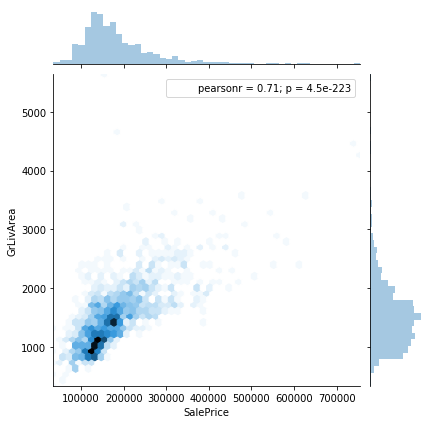

In [35]:
sns.jointplot(x='SalePrice', y='GrLivArea', data = df2, kind="hex")

In [36]:
#Determine all features with missing data.

In [37]:
df.isnull().sum().sort_values()[-20:]

Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [38]:
#Find a feature that should be completely droped from further analysis.

In [39]:
##Drop 3 features with the biggedt sum missing values -Alley, MiscFeature, PoolQC

In [40]:
df = df.drop(df.isnull().mean().sort_values().iloc[-3:].keys(), 1)

In [41]:
# here in %

In [42]:
df.isnull().mean().sort_values()[-5:]

GarageType     0.055479
GarageCond     0.055479
LotFrontage    0.177397
FireplaceQu    0.472603
Fence          0.807534
dtype: float64

In [43]:
#Select a feature with reasonable small portion of missing values (but with at least 5) and try to fill it properly.

In [44]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [45]:
df[df.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,3,2008,WD,Normal,237000


In [46]:
# Impute values based on SalePrice for example
# None value is the most popular
table = pd.crosstab(df.SalePrice, df.MasVnrType, margins=True)
display(table)
table2 = table.mul(100).floordiv(table.iloc[:,-1], axis=0).astype(str) + '%'
display(table2)

MasVnrType,BrkCmn,BrkFace,None,Stone,All
SalePrice,,,,,
34900,0,0,1,0,1
35311,0,0,1,0,1
37900,0,0,1,0,1
39300,0,0,1,0,1
40000,0,0,1,0,1
52000,0,0,1,0,1
52500,0,0,1,0,1
55000,0,0,2,0,2
55993,0,0,1,0,1


MasVnrType,BrkCmn,BrkFace,None,Stone,All
SalePrice,,,,,
34900,0%,0%,100%,0%,100%
35311,0%,0%,100%,0%,100%
37900,0%,0%,100%,0%,100%
39300,0%,0%,100%,0%,100%
40000,0%,0%,100%,0%,100%
52000,0%,0%,100%,0%,100%
52500,0%,0%,100%,0%,100%
55000,0%,0%,100%,0%,100%
55993,0%,0%,100%,0%,100%


In [47]:
df.MasVnrType = df.MasVnrType.fillna('None')

In [48]:
df[df.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
